**Funnel charts**: are most commonly used in sales and marketing.

They are particularly valuable for visualizing and analyzing the customer journey through a sales pipeline or a marketing campaign, helping to identify bottlenecks and improve conversion rates.

It's particularly useful for:

1. **Identifying bottlenecks**: By showing the drop-off at each stage, you can see where users are leaving the process, helping you identify areas for improvement.


2. **Analyzing conversion rates**: Each segment of the funnel represents a conversion step. The chart clearly shows the conversion rate between stages.


3. **Tracking customer journeys**: It helps understand how customers move through a sales pipeline, website navigation, or any multi-step process.


4. **Improving marketing and sales funnels**: It's widely used in marketing and sales to optimize conversion rates and improve the overall customer experience.
In essence, a funnel chart helps you understand the efficiency of a process by showing how many participants make it from one stage to the next.

In [1]:
import pandas as pd

# Your data
y = ["Website visits", "Downloads", "Requested price", "invoice sent", "Finalized"]
x = [38, 17, 13, 7, 3]

# Create a pandas DataFrame
data = {'Stage': y, 'Value': x}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('funnel_data.csv', index=False)

## **Example of standard funnel chart:**

**Plotly:**

In [2]:
# prompt: generate a funnel chart

!pip install plotly

import plotly.graph_objects as go

fig = go.Figure(go.Funnel(
    y = df.Stage,
    x = df.Value))

fig.show()

**Matplotlib**:

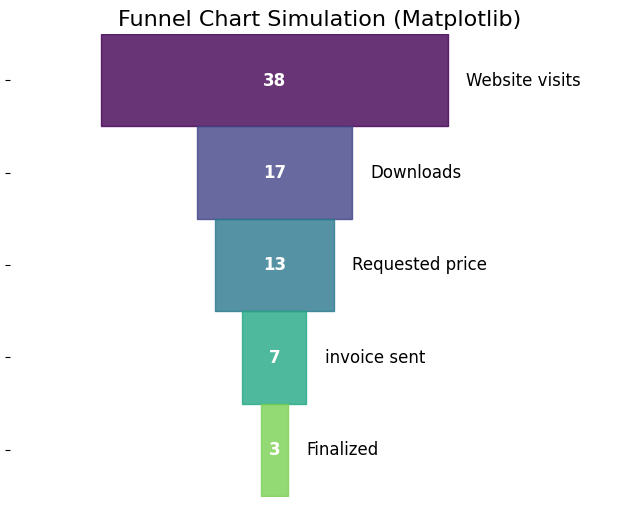

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the funnel
stages = df.Stage
values = df.Value

# Calculate the width of each stage
# This approach centers the widest part at the top
widths = values

# Define the y-coordinates for the stages (reversed for top-to-bottom)
y = np.arange(len(stages))[::-1]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the trapezoids for each stage
for i in range(len(stages)):
    # The x-coordinates for the current trapezoid
    x1 = -widths[i] / 2
    x2 = widths[i] / 2

    # The y-coordinates for the current and next stage
    y1 = y[i] - 0.5
    y2 = y[i] + 0.5

    # Use fill_between to create the trapezoid shape
    ax.fill_between([x1, x2], y1, y2, color=plt.cm.viridis(i / len(stages)), alpha=0.8)

    # Add text labels for values and stages
    ax.text(0, y[i], f"{values[i]}", ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    ax.text(widths[i] / 2 + 2, y[i], stages[i], ha='left', va='center', fontsize=12)


# Customize the plot
ax.set_yticks(y)
ax.set_yticklabels([]) # Hide the y-axis labels as we use text labels
ax.set_xticks([]) # Hide x-axis ticks
ax.set_ylim(min(y) - 0.5, max(y) + 0.5)
ax.set_xlim(-max(widths) / 2 - 10, max(widths) / 2 + 20) # Adjust x-limits for labels
ax.set_title("Funnel Chart Simulation (Matplotlib)", fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

##**Generating and plotting Funnel chart using synthetic data by Gemini🤖**

In [4]:
import numpy as np

def generate_funnel_data_numpy(start_value, num_stages, decrease_factor_range=(0.7, 0.9)):
    """
    Generates synthetic data for a funnel chart using NumPy.

    Args:
        start_value (int): The starting value for the first stage.
        num_stages (int): The number of stages in the funnel.
        decrease_factor_range (tuple): A tuple specifying the range for the
                                       multiplicative decrease factor between stages.

    Returns:
        list: A list of integer values for each stage of the funnel.
    """
    data = [start_value]
    current_value = start_value
    for _ in range(num_stages - 1):
        decrease_factor = np.random.uniform(decrease_factor_range[0], decrease_factor_range[1])
        current_value = int(current_value * decrease_factor)
        data.append(max(0, current_value)) # Ensure value doesn't go below 0
    return data

# Example usage:
stages = ["Initial Contact", "Lead Qualified", "Proposal Sent", "Negotiation", "Closed Deal"]
num_stages = len(stages)
start_value = 500
funnel_values = generate_funnel_data_numpy(start_value, num_stages)

print("\nSynthetic Funnel Data (NumPy):")
for stage, value in zip(stages, funnel_values):
    print(f"{stage}: {value}")


Synthetic Funnel Data (NumPy):
Initial Contact: 500
Lead Qualified: 414
Proposal Sent: 368
Negotiation: 282
Closed Deal: 249


**Matplotlib**:

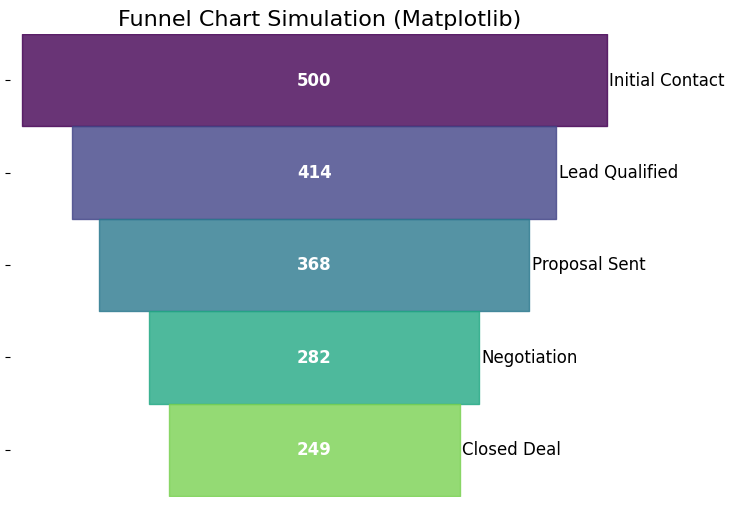

In [5]:
import matplotlib.pyplot as plt

# Data for the funnel
stages = ["Initial Contact", "Lead Qualified", "Proposal Sent", "Negotiation", "Closed Deal"]
values = funnel_values # Use the data generated in the previous section


# Calculate the width of each stage
# This approach centers the widest part at the top
widths = values

# Define the y-coordinates for the stages (reversed for top-to-bottom)
y = np.arange(len(stages))[::-1]


# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the trapezoids for each stage
for i in range(len(stages)):
    # The x-coordinates for the current trapezoid
    x1 = -widths[i] / 2
    x2 = widths[i] / 2

    # The y-coordinates for the current and next stage
    y1 = y[i] - 0.5
    y2 = y[i] + 0.5

    # Use fill_between to create the trapezoid shape
    ax.fill_between([x1, x2], y1, y2, color=plt.cm.viridis(i / len(stages)), alpha=0.8)

    # Add text labels for values and stages
    ax.text(0, y[i], f"{values[i]}", ha='center', va='center', color='white', fontsize=12, fontweight='bold')
    ax.text(widths[i] / 2 + 2, y[i], stages[i], ha='left', va='center', fontsize=12)



# Customize the plot
ax.set_yticks(y)
ax.set_yticklabels([]) # Hide the y-axis labels as we use text labels
ax.set_xticks([]) # Hide x-axis ticks
ax.set_ylim(min(y) - 0.5, max(y) + 0.5)
ax.set_xlim(-max(widths) / 2 - 10, max(widths) / 2 + 20) # Adjust x-limits for labels
ax.set_title("Funnel Chart Simulation (Matplotlib)", fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

**Plotly**:

In [6]:
# Your data 2
y = ["Initial Contact", "Lead Qualified", "Proposal Sent", "Negotiation", "Closed Deal"]
x = [500, 446, 313, 265, 235]

# Create a pandas DataFrame
data2 = {'Stage': y, 'Value': x}
df2 = pd.DataFrame(data2)

# Save the DataFrame to a CSV file
df2.to_csv('funnel_data2.csv', index=False)

In [7]:
import plotly.graph_objects as go

fig = go.Figure(go.Funnel(
    y = df2.Stage,
    x = df2.Value))

fig.show()

## **Summary analysis of the chart**

the dataset represents the progression of potential customers through a marketing or sales process. Each stage in the funnel signifies a step in this process, and the corresponding value indicates the number of individuals who have reached that stage.

Here's a breakdown of the marketing meaning:

1. **Website visits/Initial Contact**: This is the widest part of the funnel and represents the initial touchpoint where people become aware of a product or service, either by visiting a website or making initial contact.


2. **Downloads/Lead Qualified**: This stage signifies a deeper level of engagement. Users have shown more interest by downloading something (like a guide or software) or have been identified as a qualified lead based on certain criteria. There's a drop-off from the previous stage, indicating that not all initial contacts become qualified leads or download content.


3. **Requested price/Proposal Sent**: At this point, the potential customers are showing serious interest and are actively seeking more information about pricing or have received a formal proposal. The number continues to decrease, as only a subset of qualified leads moves to this stage.

4. **Invoice sent/Negotiation**: This stage indicates that a formal offer or invoice has been sent, or that negotiations are in progress. The drop-off here shows that not all proposals or price requests result in an offer being sent or accepted.


5. **Finalized/Closed Deal**: This is the narrowest part of the funnel and represents the successful conversion – the customer has made a purchase or the deal has been closed. The final value shows the number of successful conversions from the initial pool of website visitors or initial contacts.


The funnel chart effectively visualizes the conversion rate between each stage and helps identify where potential customers are dropping off the most. This information is crucial for optimizing marketing and sales strategies to improve the overall conversion rate. For example, a significant drop-off between "Downloads" and "Requested price" might suggest issues with the product information or the process for requesting pricing.